In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from config import METADATA_PATH, VISUALS_DIR

df = pd.read_csv(METADATA_PATH, sep=";", encoding="utf-8")
df.columns

Index(['title', 'type', 'year', 'filename', 'book', 'word_count', 'char_count',
       'source'],
      dtype='object')

In [19]:
df.shape

(271, 9)

#### 1. chunk lengths

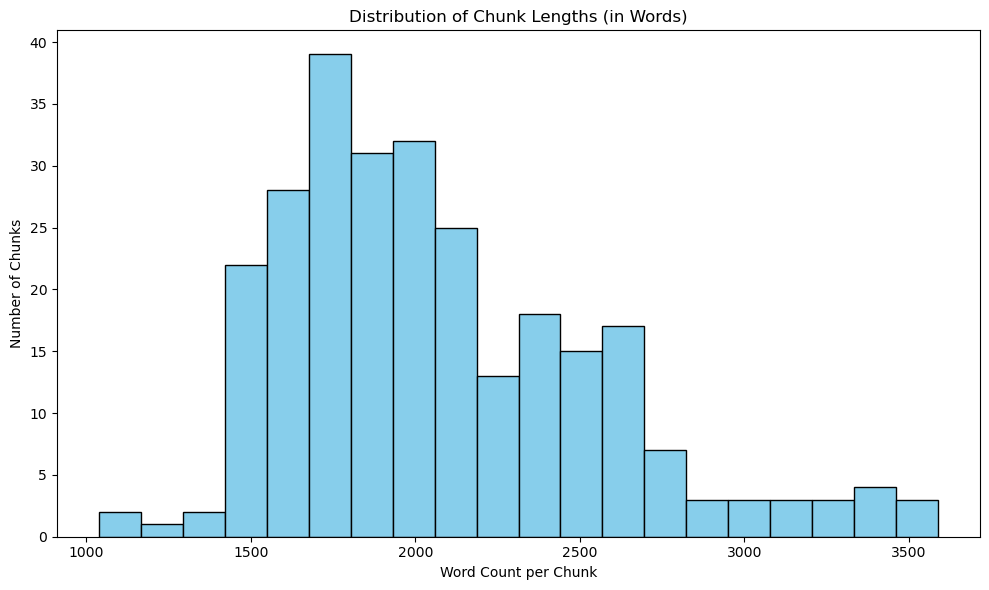

In [12]:
import matplotlib.pyplot as plt
from config import VISUALS_DIR

plt.figure(figsize=(10, 6))
plt.hist(df["word_count"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Chunk Lengths (in Words)")
plt.xlabel("Word Count per Chunk")
plt.ylabel("Number of Chunks")
plt.tight_layout()

plt.savefig(VISUALS_DIR / "chunk_length_distribution.png")
plt.show()

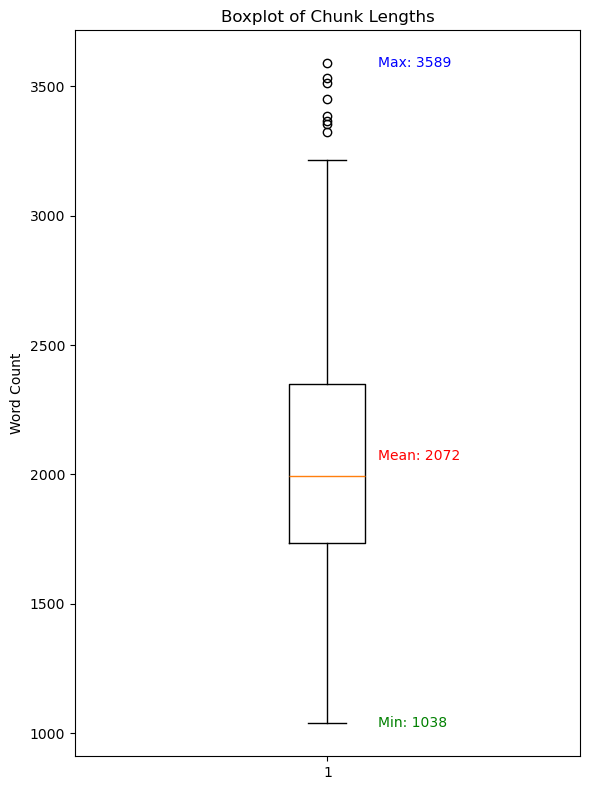

In [13]:
import matplotlib.pyplot as plt
from config import VISUALS_DIR

# Extract data
word_counts = df["word_count"]
mean_wc = word_counts.mean()
min_wc = word_counts.min()
max_wc = word_counts.max()

# Create vertical boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(word_counts, vert=True)
plt.title("Boxplot of Chunk Lengths")
plt.ylabel("Word Count")

# Annotate values
plt.text(1.1, mean_wc, f"Mean: {mean_wc:.0f}", verticalalignment='center', color='red')
plt.text(1.1, min_wc, f"Min: {min_wc}", verticalalignment='center', color='green')
plt.text(1.1, max_wc, f"Max: {max_wc}", verticalalignment='center', color='blue')

plt.tight_layout()
plt.savefig(VISUALS_DIR / "chunk_length_boxplot.png")
plt.show()

#### 2. Total Word Count per Year

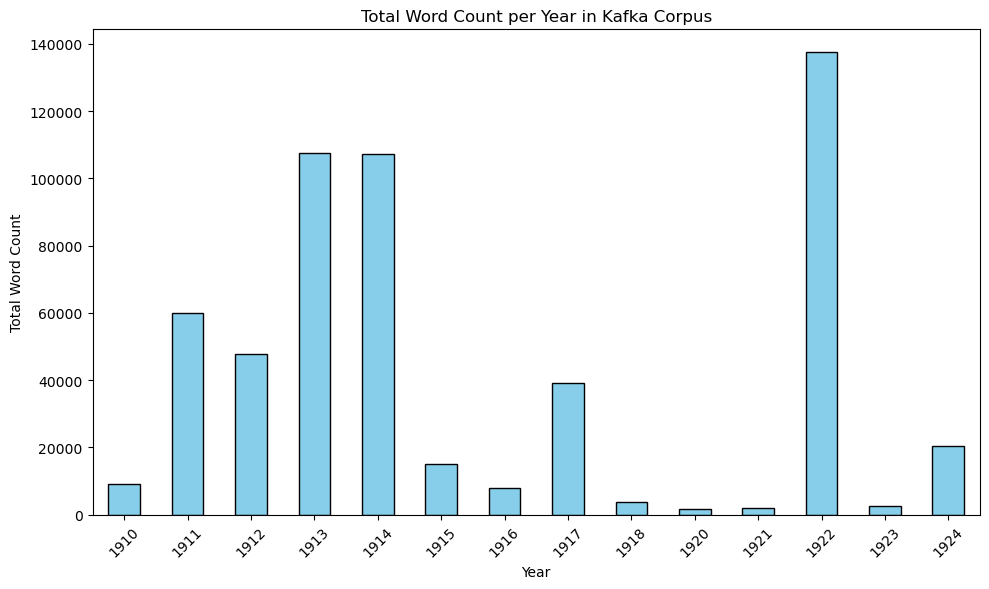

In [23]:
import matplotlib.pyplot as plt
from config import VISUALS_DIR

word_count_per_year = df.groupby("year")["word_count"].sum()

word_count_per_year = word_count_per_year.sort_index()

plt.figure(figsize=(10, 6))
word_count_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Word Count per Year in Kafka Corpus")
plt.xlabel("Year")
plt.ylabel("Total Word Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(VISUALS_DIR / "word_count_per_year.png")
plt.show()

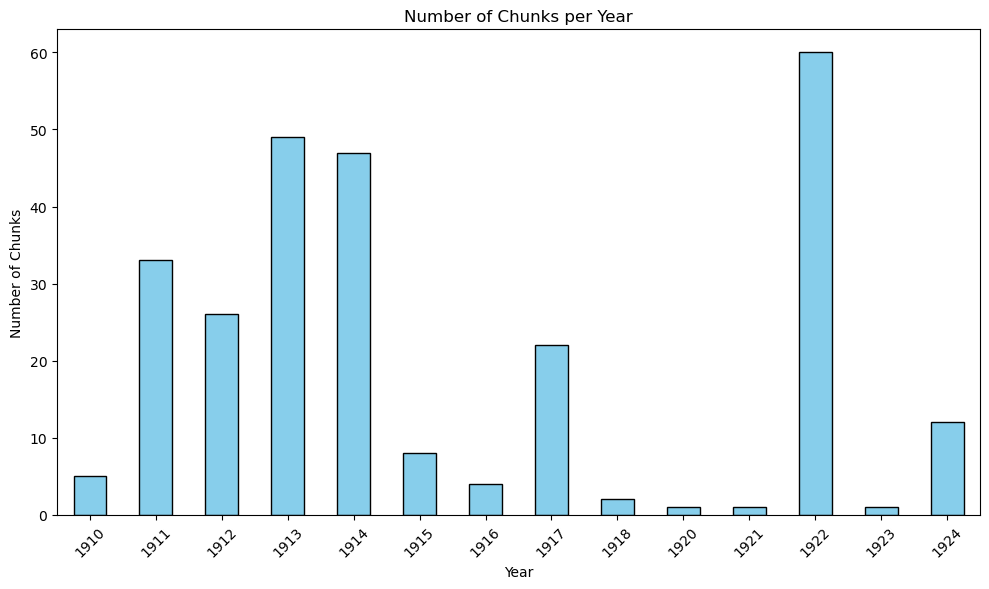

In [21]:
chunks_per_year = df["year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
chunks_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Chunks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Chunks")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(VISUALS_DIR / "chunks_per_year.png")
plt.show()

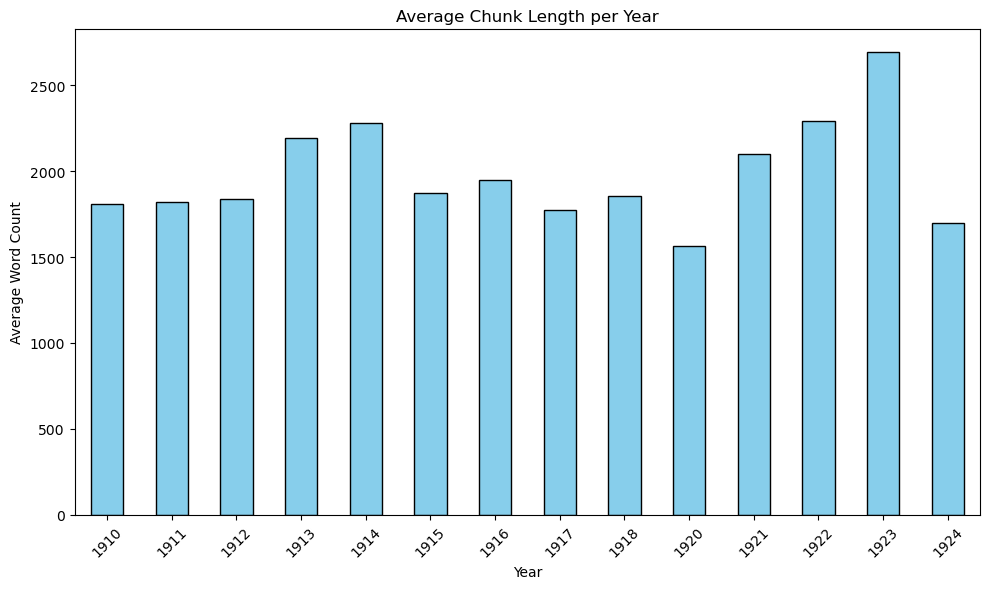

In [22]:
avg_chunk_length_per_year = df.groupby("year")["word_count"].mean()

plt.figure(figsize=(10, 6))
avg_chunk_length_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Chunk Length per Year")
plt.xlabel("Year")
plt.ylabel("Average Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(VISUALS_DIR / "avg_chunk_length_per_year.png")
plt.show()

#### 3. 4-year sections

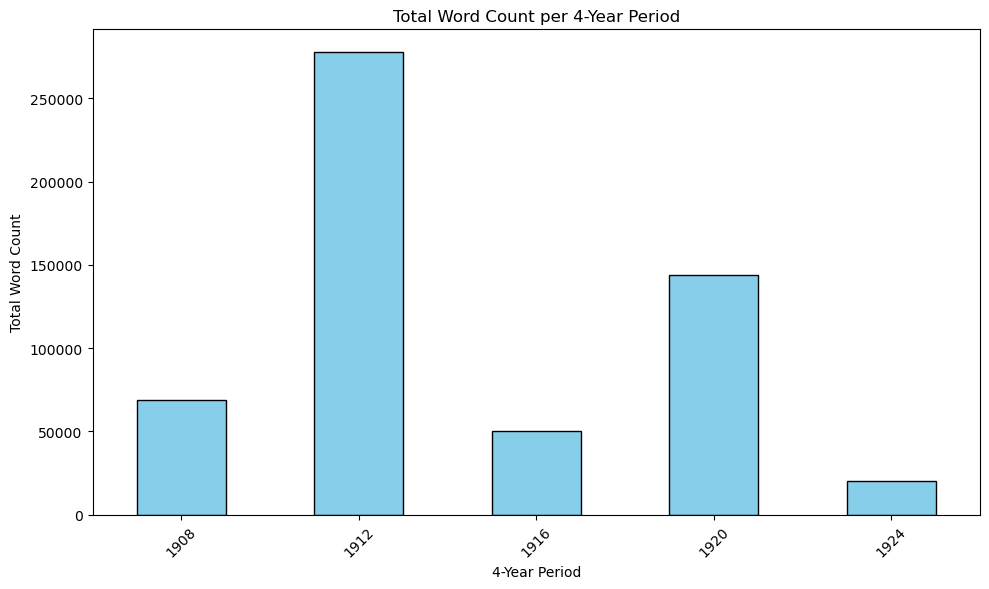

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from config import VISUALS_DIR

# Create 4-year bins
df["year_bin"] = (df["year"] // 4) * 4

word_count_by_bin = df.groupby("year_bin")["word_count"].sum().sort_index()

plt.figure(figsize=(10, 6))
word_count_by_bin.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Word Count per 4-Year Period")
plt.xlabel("4-Year Period")
plt.ylabel("Total Word Count")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(VISUALS_DIR / "word_count_per_4year_period.png")
plt.show()

#### 3. Inspecting the type

<Figure size 1200x600 with 0 Axes>

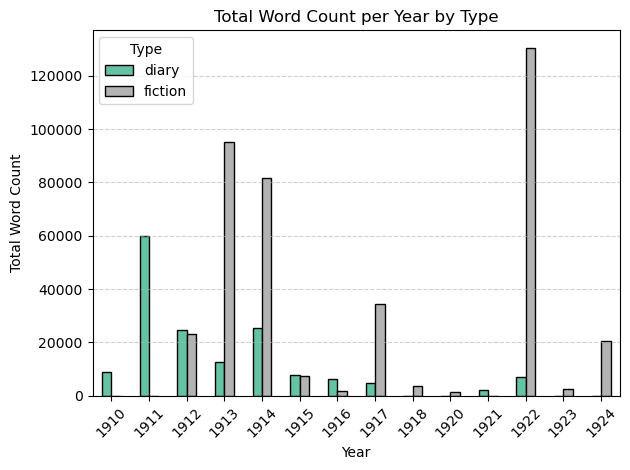

In [ ]:
# Group by year and type, summing word count
grouped = df.groupby(["year", "type"])["word_count"].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
grouped.plot(kind="bar", stacked=False, edgecolor="black", colormap="Set2")

plt.title("Total Word Count per Year by Type")
plt.xlabel("Year")
plt.ylabel("Total Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Save the plot
plt.savefig(VISUALS_DIR / "word_count_per_year_by_type.png")
plt.show()

#### Word count in the corpus and grouped by type

In [ ]:
total_words = df["word_count"].sum()

fiction_words = df[df["type"] == "fiction"]["word_count"].sum()

diary_words = df[df["type"] == "diary"]["word_count"].sum()

print(f"Total word count (all): {total_words:,}")
print(f"Total word count (fiction): {fiction_words:,}")
print(f"Total word count (diary): {diary_words:,}")

Total word count (all): 561,460
Total word count (fiction): 402,100
Total word count (diary): 159,360
